In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [33]:
def luminosity_to_jy(velocity, data):
        alpha = 3.255 * 10**7
        rest = 115.27 
        sigma = (data['Luminosity(K km s-1 pc2)'] * ( (1 + data['#redshift']) * rest **2)) / (alpha * velocity * (data['luminosity distance(Mpc)']**2))
        redshift = data['#redshift'].values
        
        #return ((3.255*10**7)*data['Luminosity(K km s-1 pc2)']* velocity *(data['luminosity distance(Mpc)']**2))/((240**2)*(1+data['#redshift'])**3)
        low_redshift = redshift[redshift < 1]
        low_sigma = sigma[redshift < 1]
        high_redshift = redshift[redshift >= 1]
        high_sigma = sigma[redshift >= 1]

        mean, std = high_sigma.mean(), high_sigma.std()
        high_redshift = high_redshift[abs(high_sigma - mean) < 3*std]
        high_sigma = high_sigma[abs(high_sigma - mean) < 3*std]
        
        #high_redshift = high_redshift[abs(high_red - mean) < 3*std
        return sigma
def exponential_func(x, a, b):
        return a * np.exp(-b * x)

def sample_from_brightness(n, velocity, data_path):
    """
    Generates n samples of brightness values based on an exponential fit to the data.
    
    Parameters:
    n (int): Number of samples to generate.
    velocity (float): The velocity used to calculate the brightness in Jy.
    data_path (str): Path to the CSV file containing the data.
    
    Returns:
    tuple: A tuple containing the sampled brightness values (sigma) and the corresponding redshifts.
    """
    # Read the data from the CSV file
    data = pd.read_csv(data_path)
    
    # Calculate the brightness values (sigma) using the provided velocity
    sigma = luminosity_to_jy(velocity, data)
    
    # Extract the redshift values from the data
        redshift = data['#redshift'].values
    
    # Generate evenly spaced redshifts for sampling
        sampled_redshifts = np.linspace(min(redshift), max(redshift), n)
    
    # Fit an exponential curve to the data
        popt, pcov = curve_fit(exponential_func, redshift, sigma)
    
    # Use the fitted parameters to calculate the sampled brightness values
        sampled_sigma = exponential_func(sampled_redshifts, *popt)
    
    # Return the sampled brightness values and the corresponding redshifts
        return sampled_sigma, sampled_redshifts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #redshift                 67 non-null     float64
 1   Luminosity(K km s-1 pc2)  67 non-null     float64
 2   Sigma(Jy)                 67 non-null     float64
 3   luminosity distance(Mpc)  67 non-null     float64
dtypes: float64(4)
memory usage: 2.2 KB


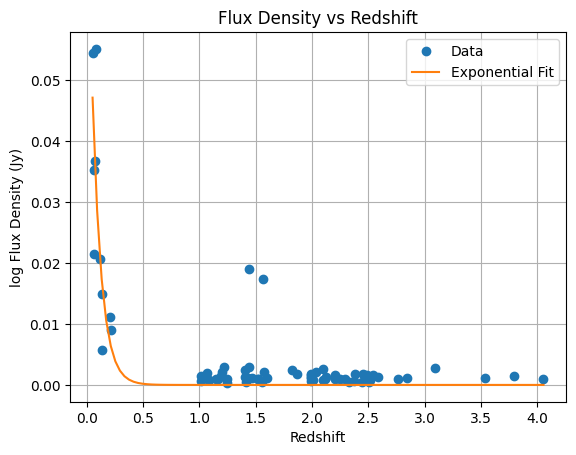

SyntaxError: 'return' outside function (4199380026.py, line 35)

In [42]:
data = pd.read_csv('/home/astro/Documents/GitHub/ALMASim/brightnes/CO10_luminosityFunction.dat', sep='\t')
data.info()
intensity = luminosity_to_jy(200, data)
redshift = data['#redshift'].values
def second_order_func(x, a, b, c):
  return a * x**2 + b * x + c

def exponential_func(x, a, b):
        return a * np.exp(-b * x)

def linear_func(x, a, b):
        return a * x + b
n = 100
exp_popt, exp_pcov = curve_fit(exponential_func, redshift, intensity, method='trf')
#par_popt, par_pcov = curve_fit(second_order_func, redshift, intensity,method='trf')
#lin_popt, lin_pcov = curve_fit(linear_func, redshift, intensity, method='trf')
#sampled_redshifts = np.linspace(min(redshift), max(redshift), n)
sampled_exp_intensities = exponential_func(sampled_redshifts, *exp_popt)
#sampled_par_intensities = second_order_func(sampled_redshifts, *par_popt)
#sampled_lin_intensities = linear_func(sampled_redshifts, *lin_popt)
#exp_perr = np.sqrt(np.diag(exp_pcov))
##par_perr = np.sqrt(np.diag(par_pcov))
#lin_perr = np.sqrt(np.diag(lin_pcov))
#plt.figure(figsize=(10, 5))
plt.plot(redshift, intensity, 'o', label='Data')
plt.plot(sampled_redshifts, sampled_exp_intensities, label='Exponential Fit')
#plt.plot(sampled_redshifts, sampled_par_intensities, label='Second Order Fit')
#plt.plot(sampled_redshifts, sampled_lin_intensities, label='Linear Fit')
plt.xlabel('Redshift')
plt.ylabel('log Flux Density (Jy)')
plt.title('Flux Density vs Redshift')
plt.legend()
plt.grid()
plt.show()
sampled_exp_intensities






#plt.scatter(data['#redshift'], data['Sigma(Jy)'], s=1)
#plt.show()

In [ ]:



def sample_extration(n, brightness_path=None, velocity=200):
    data = pd.read_csv(brightness_path, sep='\t')
    intensity = luminosity_to_jy(velocity, data)
    redshift = data['#redshift']
    
        
    

N=15
file_path_dat='C:\\Users\\lsann\\Desktop\\Tesi Magistrale\\Visual Studio\\CO10_luminosityFunction.dat'
sample = sample_extration(N,file_path_dat)
print('The extracted brightnesses sample is:\n')
print(sample)